

![title](https://files.taxfoundation.org/20170803113208/100-Map-01.png)



In [119]:
ppp_map={'FL':100.5, 'GA':107.99, 'AL':115.21, 'SC':110.74}

In [320]:
def income_helper(x):
    if x<30000:
        return 'income_<30k'
    elif x<50000:
        return 'income_30k<50k'
    elif x<70000:
        return 'income_50k<70k'
    else:
        return 'income_>70k'

In [321]:
def house_helper(x):
    if x<100000:
        return 'house_<100k'
    elif x<150000:
        return 'house_100k<150k'
    elif x<250000:
        return 'house_150k<250k'
    else:
        return 'house_>250k'

In [341]:
cut_model = RandomForestRegressor()

In [342]:
%%time
cut_model.fit(df13, y_f)

CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 58.6 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [343]:
cut_model.feature_importances_

array([ 0.00997998,  0.04630862,  0.42682361,  0.01647207,  0.01138474,
        0.05037381,  0.00136157,  0.43729561])

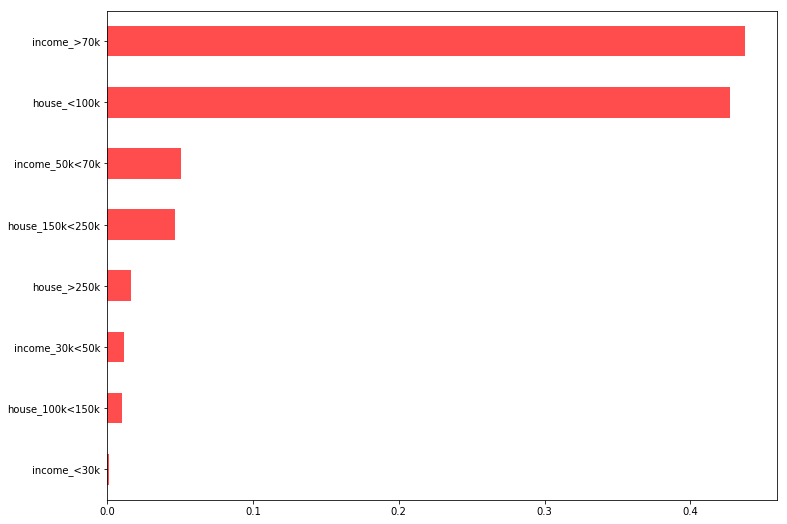

In [344]:
plt.figure(figsize=[12, 9])
pl2 = pd.Series(cut_model.feature_importances_, index=df13.columns)
pl2=pl2.sort_values()
pd.Series(pl2).plot(kind='barh', color='r',alpha=.7)

In [346]:
for i,j in zip(df13.sum().index, df13.sum()):
    print i,str(j)+ '/'+str(df13.shape[0])

house_100k<150k 803/3070
house_150k<250k 664/3070
house_<100k 1318/3070
house_>250k 285/3070
income_30k<50k 1383/3070
income_50k<70k 724/3070
income_<30k 627/3070
income_>70k 336/3070


In [348]:
df13

,house_100k<150k,house_150k<250k,house_<100k,house_>250k,income_30k<50k,income_50k<70k,income_<30k,income_>70k
zip,,,,,,,,
1002,0,0,0,1,0,1,0,0
1075,0,1,0,0,0,1,0,0
1267,0,0,0,1,0,0,0,1
1913,0,0,0,1,0,0,0,1
2346,0,0,0,1,0,0,0,1
2903,0,1,0,0,0,0,1,0
2905,0,1,0,0,1,0,0,0
2911,0,1,0,0,0,1,0,0
3053,0,0,0,1,0,0,0,1


In [356]:
df10[['income_per_household','state_O','ppp','PPP_income_househould']]

,income_per_household,state_O,ppp,PPP_income_househould
zip,,,,
1002,54422.0,FL,100.50,54694.1100
1075,61431.0,GA,107.99,66339.3369
1267,72352.0,GA,107.99,78132.9248
1913,78486.0,AL,115.21,90423.7206
2346,77607.0,AL,115.21,89411.0247
2903,26173.0,GA,107.99,28264.2227
2905,41332.0,SC,110.74,45771.0568
2911,51288.0,FL,100.50,51544.4400
3053,92053.0,FL,100.50,92513.2650
